# Pima Indians Diabetes Prediction 
### Krysten Nguyen


#### Q1: Loading dataset - Categorical and Numerical Variables


In [112]:
import pandas as pd
data = pd.read_csv('PimaIndianDiabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [113]:
# convert Outcome to be categorical
data['Outcome'] = data['Outcome'].astype('category')
print(data.dtypes)

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object


### Q2: Graph variables and outcome
Since every predicting variables are continuous, I am using boxplot to graph each variable to the outcome

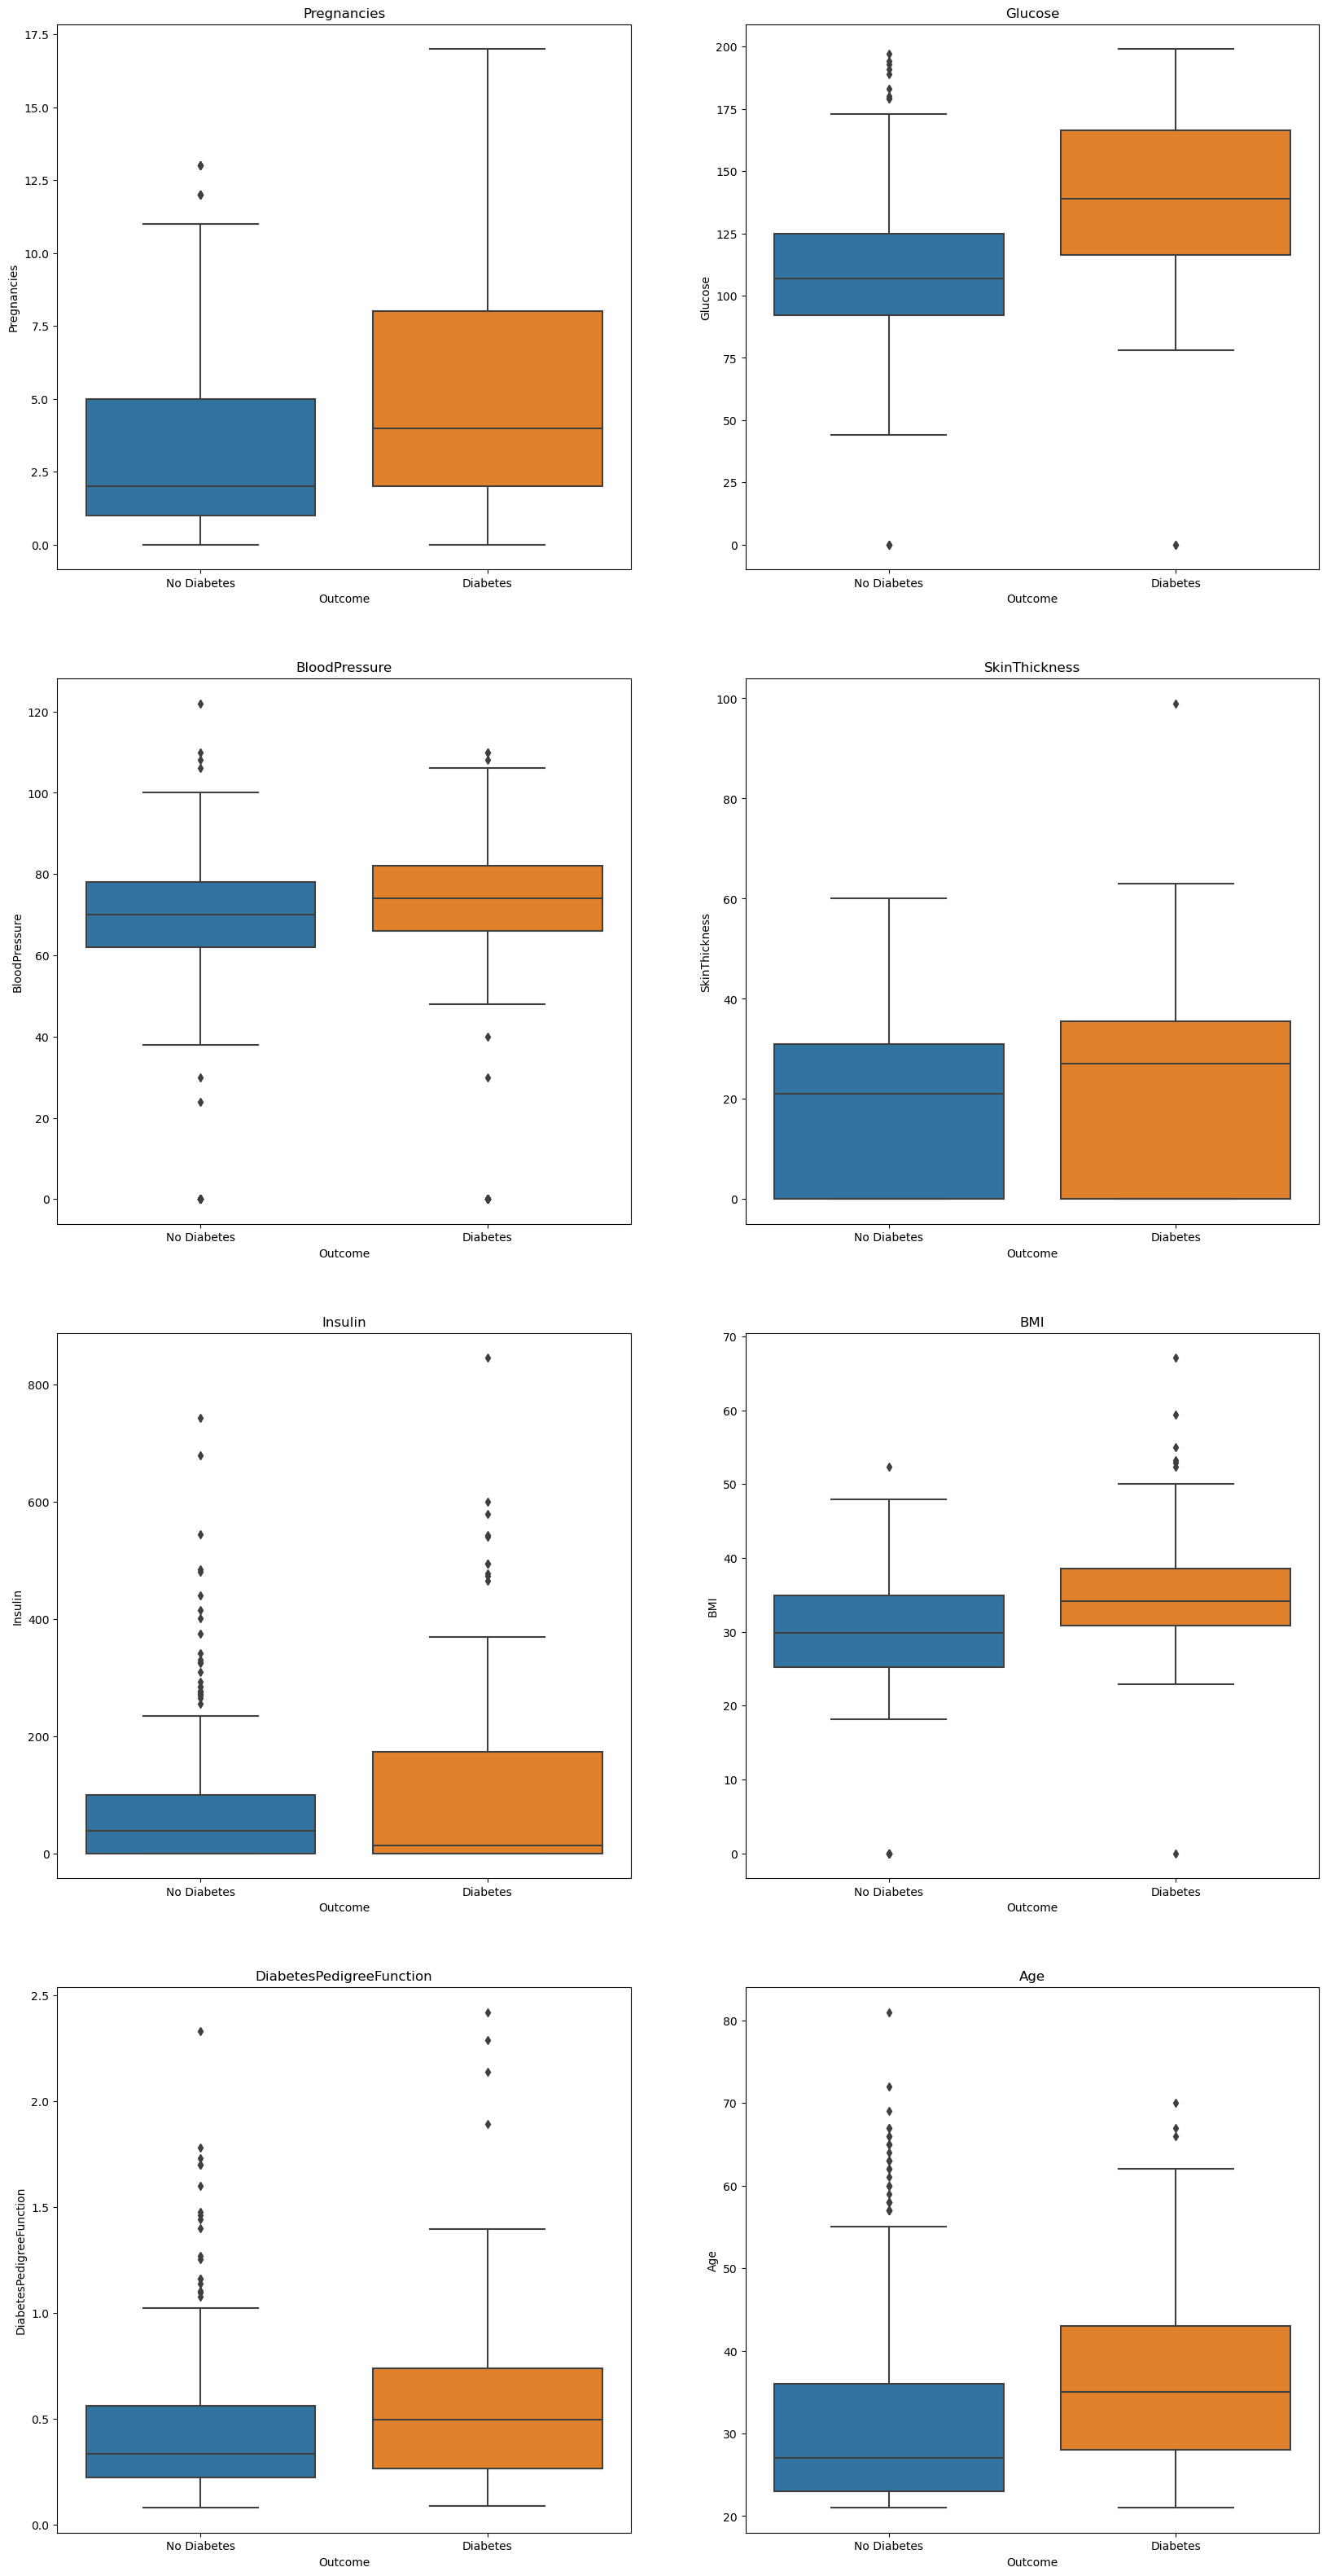

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
features = data.drop('Outcome', axis=1)


plt.subplots(4, 2, figsize=(20, 40))
for feature in features:
    plt.subplot(4, 2, features.columns.get_loc(feature)+1)
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
    plt.title(feature)


   

### Q3: Handle missing data

In [115]:
# split the data into training and testing sets 70% - 30%, stratify to ensure equal distribution of classes
# random_state for reproducibility
SEED = 42
from sklearn.model_selection import train_test_split
features = data.drop('Outcome', axis=1)
target = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, stratify=target, random_state=SEED)
# save pretransformed data
X_train_pretransformed = X_train.copy()
X_test_pretransformed = X_test.copy()




In [116]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

There is no null data.

In [117]:
(X_train==0).sum()

Pregnancies                  64
Glucose                       4
BloodPressure                20
SkinThickness               138
Insulin                     225
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Missing data marked as 0 in Glucose, BloodPressure, SkinThickness, Insulin, BMI needs to be imputed. I will impute with the mean of the features

In [118]:
# convert 0 values to NaN in Glucose, BloodPressure, SkinThickness, Insulin, BMI to differentiate
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [119]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
# impute fit to training set
imputer.fit(X_train[cols_to_impute])
X_train[cols_to_impute] = imputer.transform(X_train[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])



In [120]:
print(X_train.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
274           13    106.0           70.0      28.890578  150.735537  34.2   
23             9    119.0           80.0      35.000000  150.735537  29.0   
622            6    183.0           94.0      28.890578  150.735537  40.8   
542           10     90.0           85.0      32.000000  150.735537  34.9   
104            2     85.0           65.0      28.890578  150.735537  39.6   

     DiabetesPedigreeFunction  Age  
274                     0.251   52  
23                      0.263   29  
622                     1.461   45  
542                     0.825   56  
104                     0.930   27  


### Q4: Max-min scaler normalization
•	Subtract each value by the min of that feature and then divide this difference by the difference of the max and min of the feature.

•	 New_x = (x – x_min)/(x_max – x_min)


In [121]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



### Q5: Building the models

In [122]:
X_train = pd.DataFrame(X_train, columns=features.columns)
X_test = pd.DataFrame(X_test, columns=features.columns)
print(X_train.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0     0.764706  0.345070       0.469388       0.237941  0.16334  0.327198   
1     0.529412  0.436620       0.571429       0.304348  0.16334  0.220859   
2     0.352941  0.887324       0.714286       0.237941  0.16334  0.462168   
3     0.588235  0.232394       0.622449       0.271739  0.16334  0.341513   
4     0.117647  0.197183       0.418367       0.237941  0.16334  0.437628   

   DiabetesPedigreeFunction       Age  
0                  0.074388  0.516667  
1                  0.079733  0.133333  
2                  0.613363  0.400000  
3                  0.330067  0.583333  
4                  0.376837  0.100000  


In [123]:
# check ratio of diabetes to no diabetes
print(target.value_counts())


Outcome
0    437
1    231
Name: count, dtype: int64


I will first run all the preliminary models without any hyperparameter tuning and then I will tune the hyperparameters of the best performing model.
I will assess each model based on accuracy and AUROC.



#### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Random Forest ROC AUC:', roc_auc_score(y_test, y_pred_proba))



Random Forest Accuracy: 0.746268656716418
Random Forest ROC AUC: 0.8365321701199564


#### SVM

In [125]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_proba = svc.decision_function(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred))
print('SVM ROC AUC:', roc_auc_score(y_test, y_pred_proba))


SVM Accuracy: 0.746268656716418
SVM ROC AUC: 0.8436205016357688


#### KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]
print('KNN Accuracy:', accuracy_score(y_test, y_pred))
print('KNN ROC AUC:', roc_auc_score(y_test, y_pred_proba))


KNN Accuracy: 0.746268656716418
KNN ROC AUC: 0.7999454743729553


#### Neural Networks


In [136]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)[:,1]
print('MLP Accuracy:', accuracy_score(y_test, y_pred))
print('MLP ROC AUC:', roc_auc_score(y_test, y_pred_proba))


MLP Accuracy: 0.7711442786069652
MLP ROC AUC: 0.8298800436205017


### Hyperparameter Tuning - Neural Network

In [133]:
# hyperparameter tuning for Neural Network with grid search

from sklearn.model_selection import GridSearchCV
param_grid = {'hidden_layer_sizes': [(8,),(8,8),(8,8,8),(16,16), (32,32), (64,64),(100,100)],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'alpha': [0.001, 0.01,0.1,1, 10]}

mlp = MLPClassifier(max_iter=1000)
grid_search = GridSearchCV(mlp, param_grid, refit=True, cv=3, n_jobs=4, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
print('Best estimator:', grid_search.best_estimator_)


/Users/krysten/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/krysten/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/krysten/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/krysten/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/krysten/anaconda3

Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (8,), 'learning_rate': 'constant'}
Best score: 0.7880204025365316
Best estimator: MLPClassifier(alpha=0.01, hidden_layer_sizes=(8,), max_iter=1000)


In [134]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc

best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
y_pred_proba = best_mlp.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)
print('Best MLP Test Accuracy:', accuracy_score(y_test, y_pred))
print('Best MLP Test AUROC:', roc_auc_score(y_test, y_pred_proba))
print('Best MLP Test AUPRC:', auprc)




Best MLP Test Accuracy: 0.7313432835820896
Best MLP Test AUROC: 0.8464558342420938
Best MLP Test AUPRC: 0.7128045092336167


### Q6: Saving the model

In [135]:
import pickle
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean', missing_values=0)),
                        ('scaler', MinMaxScaler()),
                        ('mlp', best_mlp)])

pipeline.fit(X_train_pretransformed, y_train)

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
    
